<a href="https://colab.research.google.com/github/dyunus21/DiscoverAIGroup2/blob/main/AI4ALL_recipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teamwork Activities

In [195]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
df = pd.read_csv('/content/drive/MyDrive/AI4ALL Group 11/RAW_recipes.csv', engine='python',error_bad_lines=False)
df.head()
# Whole dataframe
#df.head(len(df.index))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,name,id,minutes,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [198]:
# Num rows
num_rows = len(df.index)
print(num_rows)
# Num cols
num_cols = len(df.axes[1])
print(num_cols)
# Data types in columns
df.dtypes


231637
10


name             object
id                int64
minutes           int64
tags             object
nutrition        object
n_steps           int64
steps            object
description      object
ingredients      object
n_ingredients     int64
dtype: object

In [199]:
# Names of columns
df.columns
df.drop(df.index[df['minutes'] > 600], inplace=True)
df['minutes'].max()


600

Text(0, 0.5, 'Number of Recipes')

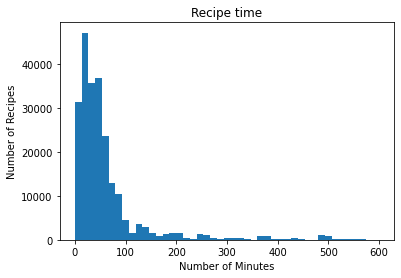

In [200]:
#Visualizations - bar graphs, histograms, 
plt.hist(df['minutes'],bins = 45)
plt.title("Recipe time")
plt.xlabel("Number of Minutes")
plt.ylabel("Number of Recipes")

Text(0, 0.5, 'Number of Recipes')

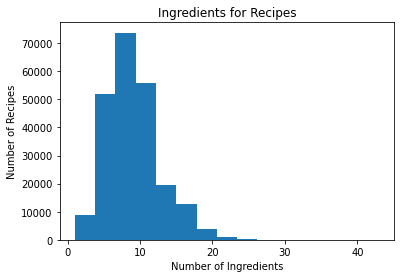

In [201]:
plt.hist(df['n_ingredients'], bins = 15)
plt.title("Ingredients for Recipes")
plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Recipes")

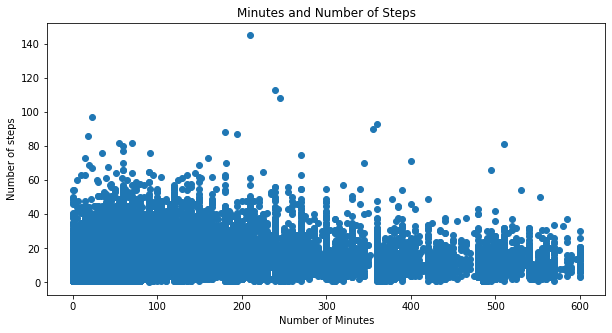

In [202]:
plt.figure(figsize=(10,5))
plt.title("Minutes and Number of Steps")
plt.xlabel("Number of Minutes")
plt.ylabel("Number of steps")
plt.scatter(df['minutes'],df['n_steps'])

Discussion: Describe your dataset. How many rows are there? What are the names of some interesting columns? Which data type are the columns?

What are a few predictions you would like to investigate?

What do your initial data visualizations tell you about your data?

What inconsistencies do you notice in your data? What are other columns (“features”) you would like to add to your data?

1. There are 231,637 rows and 10 columns. Some of the interesting columns include the nutrition, steps, and ingredients. The data types are all objects (lists).
2. When a user interacts with the chatbot, our goal is to have our algorithm parse based off a variety of user preferences. These preferences include fetching recipes that are under a certain caloric count, cook or prep time, include certain ingredients, have a small number of ingredients, and other fun preferences (like if the dish is labeled as an easy weeknight dish).
3. We were able to use our initial data visualizations (histogram) to realize that we had some extreme outliers for the minutes that we had to discard from the data, as they were probably errors. We could also see that on average, most of these recipes require around 9 ingredients, but we see some outliers at around 25, and some with about 2 ingredients. This can be very helpful for users to limit how many ingredients they want.We thought it was very interesting that the plot of the minutes and steps did not show more of a pattern, since some things that take much less minutes still have similar if not more steps than the long ones.

4. We have some problems with some minutes being extremely high, probably errors. We decided to only consider recipes that can be made in less than 600 minutes (10 hours). Before uploading, we cleansed our dataset of unnecessary columns to limit file size, but there are no gaps or null entries within our dataset. As of right now, for our chatbot recipe purposes, we are satisfied with the amount of data in the datset; we have the nutritional values, the steps, the ingredients, and some helpful tags that are necessary for recipe fetching. If possible, serving size would be a helpful column, but we don't think it is included in the data.

Data Preparation:

In our dataset, we don't have any missing values. However, we did notice some inconsistencies with the minutes category in our dataset. We realized some dishes took hundreds of thousands of minutes to cook, and we weren't sure if it was a mistake or required some long term process. However, for our purposes, we decided to limit this to make our dataset only keep recipes of at most 600 minutes. That way it still included some slow roast dishes, but anything more than 10 hours was unreasonable for our purposes. Additonally, to try to make our dataset smaller and more manageable, we deleted some columns that we knew were irrelevant to our chatbot, like uploader id. One transformation we would like to make is to split up the nutritional values so each value is in its own column. For example, the nutrition column is bunched in a list that has calories, saturated fats, etc., but we would like there to be one column for calories, one for saturated fats, and so on.


**Data visualization**

Our dataset contains various kinds of recipes including ingredients, cooking time, nutritional information, and useful tags that could be used to classify the recipe into categories.

This dataset is a really useful component of providing recipe suggestions to users that utilize our recipe chatbot. Through our visualizations, we wanted to show the readers the number of ingredients and time it takes to create these recipes.

For the most part, we decided to use histograms with the exception of one scatter plot for graphing minutes by number of steps. We made this decision because most of our data is categorical in a sense, and can't explicitly be graphed or compared to other recipes. That's why most of our graphs compare one attribute at a time, and the only one that compares multiple is the scatter plot since it is the only logical comparison.

One thing that is important to note is the bias that comes from the uploaders. We don't know where the uploaders are from or what skill level they expect from people using their recipes which could introduce bias. However, these are impossible to tell from the dataset. Another thing that doesn't affect purity but would have been useful to have that is not captured in the dataset is the serving size. This would be a really nice feature for users to be able to consider.

**Implementation, Testing, and Training**

We are evaluating the performance of our implementation in two ways. One way we are checking to see if our algorithm works is by inputting the exact ingredients of a recipe and assuring our output is that recipe name.
Another way we will test our algorithm is by putting in a couple ingredients and making sure our output is the recipe that has the most of those ingredients out of all recipes.
We will also test that our algorithm works with ingredients that are already in the dataset and ingredients that the algorithm has not seen, so we know that the program doesn't crash with an unexpected input.

Our reasoning for taking this approach is these are the ways that we expect our algorithm to be used, so these are the ways we should guarantee our algorithm to work with. This way we can easily compare our input and outputs and guarantee that our program works as expected.

# Algorithm


In [203]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import DictVectorizer

In [204]:
data = df.values
NUM_RECIPES = 5000
new_data = []
data = data[:NUM_RECIPES]
for i in data:
  recipe = []
  recipe.append(i[0])  # Recipe Name
  ingredients = list(i[8].strip('][').split(', '))
  for j in ingredients:
    recipe.append(j[1:-1]) # ingredients
  new_data.append(recipe)

data_dict = {}
for i in new_data:
  data_dict[i[0]] = i[1:]

recipe_names = []
for i in new_data:
  recipe_names.append(i[0])

recipe_names = np.array(recipe_names)
recipe_names = recipe_names.reshape(-1)

In [205]:
all_recipes = []
ALL_INGREDIENTS = set()
# Make a dict for each recipe
for i in data:
  ingredients = list(i[8].strip('][').split(', '))
  recipe_dict = {}
  for j in ingredients:
    ALL_INGREDIENTS.add(j[1:-1])
    recipe_dict[j[1:-1]] = 1
  all_recipes.append(recipe_dict)
#print(all_recipes)

In [206]:
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(all_recipes)
Y = recipe_names

In [207]:
mnb = MultinomialNB()
mnb.fit(X, Y)

MultinomialNB()

In [208]:
import re

# All string parsing and outputting here :)
def getRecipe(user_input):
  recipes_plus_input = all_recipes.copy()
  parsed_input = list(user_input.split(', '))
  # One way to ignore not provided ingredients is remove them before dict
  possible_ingredients = []
  for i in parsed_input:
    if i in ALL_INGREDIENTS:
      possible_ingredients.append(i)

  input_dict = {}
  for i in possible_ingredients:
    input_dict[i] = 1

  recipes_plus_input.insert(0, input_dict)
  test_data = dv.fit_transform(recipes_plus_input)
  predictions = mnb.predict(test_data)
  prediction = predictions[0]
  print(prediction) # Outputs the predicted recipe name based off the given ingredients
  recipe_name = prediction
  print(f"Recipe: {recipe_name}")
  recipes = df.head(NUM_RECIPES)
  row_in_df = recipes.loc[recipes['name'] == recipe_name]
  ingredients = row_in_df['ingredients'].values[0]
  parsed_ingredients = list(ingredients.strip('][').split(', '))
  output_ingredients = "Ingredients: "
  count = 0
  for i in parsed_ingredients:
    if count:
      output_ingredients += ", "
    count = 1
    output_ingredients += f"{i[1:-1]}"
  print(output_ingredients)

  steps = row_in_df['steps'].values[0]
  steps = steps.strip('][')
  parsed_steps = list(re.split('\',|\",', steps))
  output_steps = "Steps: \n" 
  counter = 1
  for i in parsed_steps:
    i = i.lstrip()
    i = i.strip('\'\'"')
    output_steps += f"{counter}. {i} \n" 
    counter += 1
  print(output_steps)
  return recipe_name
user_input = input("Enter your ingredients: ") # enter comma-separated ingredients, but be in provided dataset unfortunately
recipe_name = getRecipe(user_input)

Enter your ingredients: apple
alexis apple crunch
Recipe: alexis apple crunch
Ingredients: apple, candy sprinkles
Steps: 
1. first take the apple and cut the top 
2. then add nonpareils sprinkles 



# Testing


In [209]:
# Test an input that is an exact match for a recipe
test_input = {'winter squash': 1, 'mexican seasoning': 1, 'mixed spice': 1, 'honey': 1, 'butter': 1, 'olive oil': 1, 'salt': 1}
# This is the exact ingredient list for arriba baked winter squash mexican style
recipes_plus_input = all_recipes.copy()
recipes_plus_input.insert(0, test_input)
test_data = dv.fit_transform(recipes_plus_input)
predictions = mnb.predict(test_data)

prediction = predictions[0]
actual = 'arriba   baked winter squash mexican style'
print(f'Prediction: {prediction}, Actual: {actual}')

Prediction: arriba   baked winter squash mexican style, Actual: arriba   baked winter squash mexican style


In [216]:
# Test an input that has some of the ingredients for a recipe
if(getRecipe("corn") == "amish chicken corn soup"):
  print("The output is correct!")
else:
  print("Output is incorrect!")
if(getRecipe("milk") == "all chocolate boston cream pie"):
  print("The output is correct!")
else:
  print("Output is incorrect!")
if(getRecipe("apple") == "alexis apple crunch"):
  print("The output is correct!")
else:
  print("Output is incorrect!")
# should be incorrect
if(getRecipe("apple") == "apple crumble"):
  print("The output is correct!")
else:
  print("Output is incorrect!")



amish chicken corn soup
Recipe: amish chicken corn soup
Ingredients: water, boneless skinless chicken breasts, onion, celery, carrot, chicken bouillon cubes, cream-style corn, egg noodles, butter, salt, pepper
Steps: 
1. in a dutch oven or soup kettle , combine the water , chicken , onion , celery , carrots and bouillon 
2. bring to a boil 
3. reduce heat 
4. simmer , uncovered , for 30 minutes or until chicken is no longer pink and vegetables are tender 
5. stir in the corn , noodles and butter 
6. cook 10 minutes longer or until noodles are tender 
7. season with salt and pepper 

The output is correct!
all chocolate boston cream pie
Recipe: all chocolate boston cream pie
Ingredients: all-purpose flour, sugar, butter, water, cocoa, eggs, buttermilk, baking soda, pure vanilla extract, instant chocolate pudding mix, milk, frozen whipped topping, half-and-half, confectioners' sugar
Steps: 
1. heat oven to 350 degrees 
2. for cake , combine flour and sugar in large bowl 
3. set aside 
4.

# Chat Bot


This section is incomplete. The chatterbot exists and can communicate with the user but it does not interact with the algorithm due to unforeseen constraints.

In [211]:
pip install chatterbot chatterbot_corpus pint

In [212]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer
from chatterbot.trainers import ChatterBotCorpusTrainer
from chatterbot.logic import LogicAdapter

In [213]:
class BestRecipe(LogicAdapter):
    def __init__(self, chatbot, **kwargs):
        super().__init__(chatbot, **kwargs)

    def can_process(self, statement):
        return True

    def process(self, input_statement, additional_response_selection_parameters):
        import random

        # Randomly select a confidence between 0 and 1
        confidence = random.uniform(0, 1)

        # For this example, we will just return the input as output
        selected_statement = input_statement
        selected_statement.confidence = confidence

        return selected_statement

In [214]:
bot = ChatBot('RecipeBot',
              logic_adapters=[
              'chatterbot.logic.UnitConversion',
              'chatterbot.logic.MathematicalEvaluation',
              'chatterbot.logic.BestMatch',
              {
              'import_path': 'BestRecipe'
              }
              ])

ValueError: ignored

In [ ]:
trainer = ChatterBotCorpusTrainer(bot)

# Train based on the english corpus
trainer.train("chatterbot.corpus.english")

trainer2 = ListTrainer(bot)

# Implement conversation sampless here
trainer2.train([
        
])

In [ ]:
# Prints the convertion given the specific question
question = "How are you?"
response = bot.get_response(question)
print(question + ' -  Response: ' + response.text)

In [ ]:
while True:
    try:
        user_input = input()

        bot_response = bot.get_response(user_input)

        print(bot_response)

    # Press ctrl-c or ctrl-d on the keyboard to exit
    except (KeyboardInterrupt, EOFError, SystemExit):
        break